# __Working on Forward Propagation__
In the context of neural networks, forward propagation refers to the process of passing input data through the network's layers one by one to compute the corresponding output. During forward propagation, each layer performs a series of mathematical operations, such as matrix multiplications and activation functions, to transform the input and generate an output. This process allows the network to make predictions or perform computations based on the given input data.

Let us understand how forward propagation works.

## Steps to be followed:
1. Import the required libraries
2. Initialize the data and predicting the output
3. Calculate the errors
4. Calculate the sum of squared error





### Step 1: Import the required libraries
- Import NumPy package.
- Import the Python package matplotlib, which sets the padding between and around the subplots as well as the figure size.

In [1]:
# Import the required libraries
import numpy as np
import matplotlib.pyplot as plt

### Step 2: Initialize the data and predict the output
- Initializing the data:
  - Generate an array **x** with 11 random elements.
  - Generate weights with 11 random elements.
- Predicting the output:

  - Predict the `y_pred` using the activation function.
  - Print the predicted values `y_pred`.


In [2]:
# Initialize the data and network parameters
x = np.random.rand(11)  # Random input data
weights = np.random.rand(11)  # Random weights
bias = np.random.rand(1)  # Random bias

In [3]:
# Define the activation function (ReLU)
def relu(z):
    return np.maximum(0, z)

In [4]:
# Perform forward propagation
z = np.dot(weights, x) + bias  # Linear transformation
y_pred = relu(z)  # Applying activation function
print("Predicted values (y_pred):", y_pred)

Predicted values (y_pred): [1.90152727]


In forward propagation, the input x is linearly transformed by multiplying it with the network's weights and adding the bias `(z = np.dot(weights, x) + bias)`. The resulting value z is then passed through an activation function, such as ReLU `(y_pred = relu(z))`, to introduce non-linearity into the model. The final output, y_pred, is the predicted value after these transformations and activation.

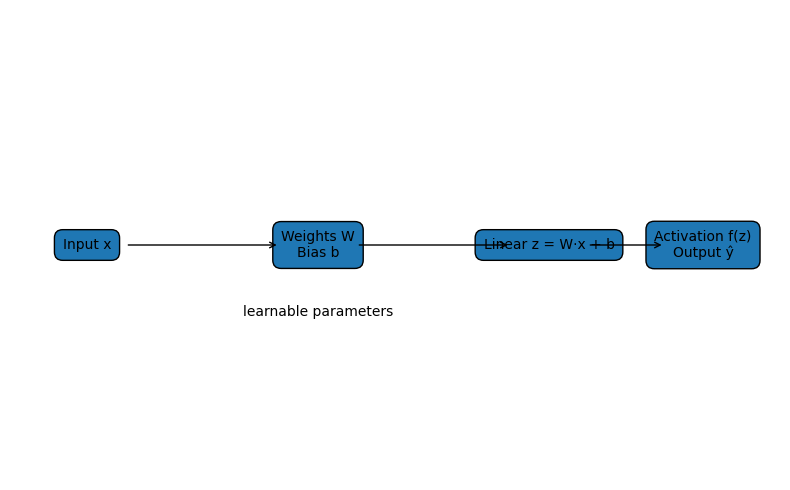

In [5]:
# Forward propagation visual: input -> linear -> activation -> output (conceptual diagram)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# Helper to draw a labeled box
def box(xy, text):
    plt.annotate(
        text, xy, xytext=xy,
        bbox=dict(boxstyle="round,pad=0.6"),
        ha="center", va="center"
    )

# Nodes
box((0.1, 0.5), "Input x")
box((0.4, 0.5), "Weights W\nBias b")
box((0.7, 0.5), "Linear z = W·x + b")
box((0.9, 0.5), "Activation f(z)\nOutput ŷ")

# Arrows
plt.annotate("", (0.35, 0.5), (0.15, 0.5), arrowprops=dict(arrowstyle="->"))
plt.annotate("", (0.65, 0.5), (0.45, 0.5), arrowprops=dict(arrowstyle="->"))
plt.annotate("", (0.85, 0.5), (0.75, 0.5), arrowprops=dict(arrowstyle="->"))

# Extras
plt.text(0.4, 0.35, "learnable parameters", ha="center")
plt.axis("off")
plt.tight_layout()
plt.show()


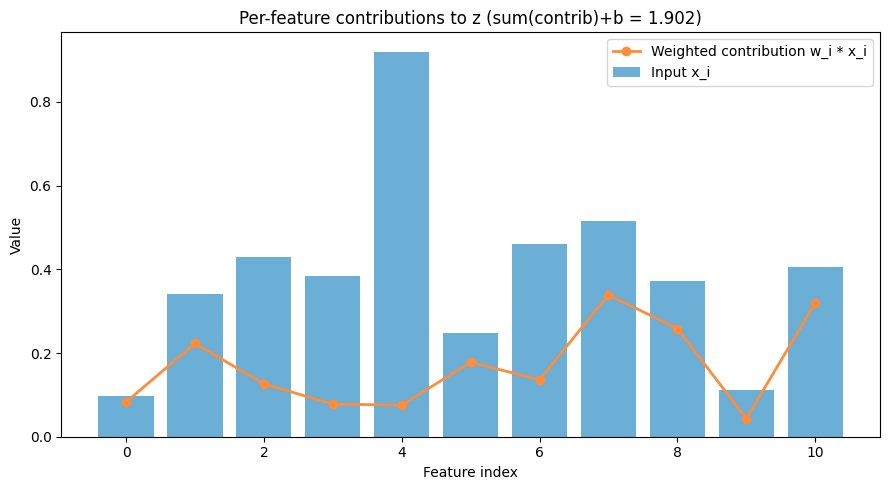

In [6]:
# Visualize per-feature contributions to the linear combination z
import numpy as np
import matplotlib.pyplot as plt

# Fallback demo data if your notebook variables don't exist
g = globals()
if not all(k in g for k in ["x", "weights", "bias"]):
    np.random.seed(0)
    x = np.random.rand(10, 1)          # shape (features, 1)
    weights = np.random.rand(1, 10)    # shape (1, features)
    bias = np.random.rand(1)

# Flatten to 1D for plotting
x_flat = np.ravel(x)
w_flat = np.ravel(weights)
contrib = w_flat * x_flat
z = np.sum(contrib) + float(np.ravel(bias)[0])

idx = np.arange(len(x_flat))

plt.figure(figsize=(9, 5))
plt.bar(idx, x_flat, color="#6baed6", label="Input x_i")  # light blue
plt.plot(idx, contrib, marker="o", linewidth=2, color="#fd8d3c", label="Weighted contribution w_i * x_i")  # orange
plt.title(f"Per-feature contributions to z (sum(contrib)+b = {z:.3f})")
plt.xlabel("Feature index")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()


### Step 3: Calculate the errors
- Set the target value **y** to 1.
- Calculate the absolute difference between the predicted values **y_pred** and the target value **y** to obtain the error. Print the error array and compute the sum of errors using the **sum()** function.


In [7]:
# Calculate the errors
y = 1  # Target value
error = abs(y_pred - y)
print("Errors:", error)
total_error = error.sum()
print("Sum of errors:", total_error)

Errors: [0.90152727]
Sum of errors: 0.9015272734259516


**Observation**
- The output represents the array of absolute differences between the predicted values **y_pred** and the target value **y** for each element in the array. The values in the array indicate the absolute errors for each corresponding element.

- The sum of the errors, which is 2.89, represents the total accumulated error when summing up all the individual absolute differences between the predicted and target values.

### Step 4: Calculate the sum of squared error
- Calculate the sum of squared errors (SSE) by squaring the absolute differences between the predicted values **y_pred** and the target value **y** for each element in the array.

The output **SSE** is an array that contains the squared errors for each corresponding element.

The sum of the squared errors, obtained by calling **SSE.sum()**, represents the total accumulated squared error when summing up all the individual squared differences between the predicted and target values.


In [8]:
# Calculate the sum of squared error
SSE = (y_pred - y)**2
print("Squared errors (SSE):", SSE)
total_SSE = SSE.sum()
print("Sum of squared errors (SSE):", total_SSE)

Squared errors (SSE): [0.81275142]
Sum of squared errors (SSE): 0.8127514247308305


**Observation**
- The output represents the sum of squared errors (SSE) calculated from the squared differences between the predicted values and the target value for each element in the array.